In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [22]:
from register import QuantumRegister
from gate import QuantumGate
from utils import plot_counts
from program_parser import parse_program

import matplotlib.pyplot as plt
from scipy.optimize import minimize

import numpy as np

import math

# Grover's Algorithm

## Without dedicated oracle qubit

In [13]:
quantum_reg = QuantumRegister(2)

In [14]:
circ = '../sample_circuits/Simple_grover.txt' # Grover oracle to look for string '11'

circ = parse_program(circ)

circ

[['h', [0, 1]],
 ['cz', [0, 1]],
 ['h', [0, 1]],
 ['z', [0, 1]],
 ['cz', [0, 1]],
 ['h', [0, 1]]]

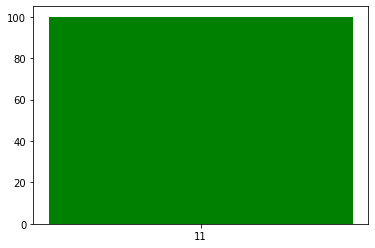

In [15]:
quantum_reg.run_program(circ)

plot_counts(quantum_reg.measure(100))

## With dedicated oracle qubit

In [16]:
quantum_reg = QuantumRegister(3)

In [17]:
circ = '../sample_circuits/Grover_with_flip_qubit.txt' # Grover oracle to look for string '01'

circ = parse_program(circ)

circ

[['h', [2]],
 ['z', [2]],
 ['h', [0, 1]],
 ['x', [0]],
 ['ccx', [0, 1, 2]],
 ['x', [0]],
 ['h', [0, 1]],
 ['z', [0, 1]],
 ['cz', [0, 1]],
 ['h', [0, 1]]]

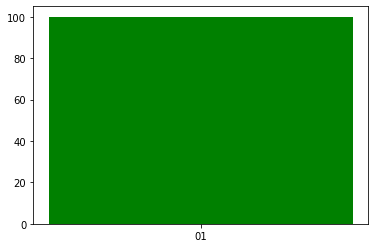

In [18]:
quantum_reg.run_program(circ)

plot_counts(quantum_reg.measure(100, [0,1]))

# Phase Estimation

# Variational Algorithms

We will attempt to find an approximation of the ZY-decomposition of the Hadamard gate. We will use the SWAP test.

In [20]:
reg = QuantumRegister(3)

In [19]:
circ = '../sample_circuits/Variational_algorithm.txt' # Grover oracle to look for string '11'

circ = parse_program(circ)

circ

[['h', [0, 2]],
 ['rz', 'global_1', [1]],
 ['ry', 'global_2', [1]],
 ['rz', 'global_3', [1]],
 ['cswap', [0, 1, 2]],
 ['h', [0]]]

In [29]:
def objective_function(params):
    reg.reset()
    reg.run_program(circ, { "global_1": params[0], "global_2": params[1], "global_3": params[2] })

    counts = reg.measure(1000, [0])

    zeros = counts['0'] if '0' in counts.keys() else 0
    ones = counts['1'] if '1' in counts.keys() else 0

    ratio = ones / zeros
    
    return 1 - ratio

In [30]:
# initial values
params = np.array([1.5708, 1.5708, 1.5708])

In [34]:
minimum = minimize(objective_function, params, method="Powell", tol=1e-6)
minimum

   direc: array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [-0.0112815 , -0.08781843,  0.05200846]])
     fun: array(-0.09205021)
 message: 'Optimization terminated successfully.'
    nfev: 294
     nit: 4
  status: 0
 success: True
       x: array([ 3.70728978,  4.75720922, -0.16368248])

Let's test the approximated angles.

In [41]:
params = minimum.x

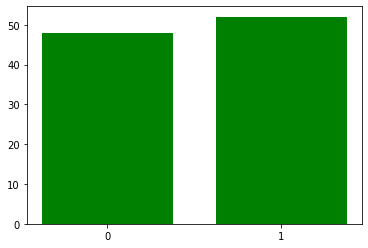

In [43]:
reg.reset()
reg.run_program(circ, { "global_1": params[0], "global_2": params[1], "global_3": params[2] })
plot_counts(reg.measure(100, [0]))